# <center> Fast Fourier Transform (FFT)

**Welcome to the fourth notebook in this series!**

In this notebook, we will be looking at the Fast Fourier Transform (FFT) algorithm. We'll use this algorithm to transform the data we have so far into data that is better suited to interpretation and understanding. 

Before working with the FFT, let's first define a few important terms below. 

<br>

## Terminology

### **Time Domain**

A time-domain graph displays the changes in a signal over a span of time. An example of a time-domain graph is shown below. It's also important to note that a majority of the graphs we have created thus far have been time domain graphs. 

![image info](Pictures/time_series_example.png)

Some characteristics seen in the time domain graph above are: <br>

**The amplitude**: The maximum extent of a vibration or displacement of a sinusoidal oscillation, measured from the position of equilibrium. Amplitude is the maximum absolute value of a periodically varying quantity.<br><br>
**The period**: The time for a particle on a medium to make one complete vibrational cycle<br><br>
**The RMS (root mean square)**: This value is generally the most useful because it is directly related to the energy content of the vibration profile and thus the destructive capability of the vibration. RMS also takes into account the time history of the wave form.<br><br>
**While these characteristics are important, they are limited and do not give us ample information about the strength of our vibration profile. In this situation, we turn to the frequency domain graph instead.**

<br>

### **The Frequency Domain**


The Frequency Domain refers to the analytic space in which mathematical functions or signals are conveyed in terms of frequency, rather than time. For example, where a time-domain graph may display changes over time, a frequency-domain graph displays how much of the signal is present among each given frequency band.  


![image info](Pictures/frequency.png)

* A waveform is actually just the sum of a series of simple sinusoids of different frequencies, amplitudes, and phases.  
* A Fourier series is that series of sine waves, and we use Fourier analysis or spectrum analysis to deconstruct a signal into its individual sine wave components.  
* The result is acceleration/vibration amplitude as a function of frequency, which lets us perform analysis in _the frequency (or spectrum) domian_ to gain a deeper understanding of our vibration profile. Most vibration analysis will typically be done in the frequency domain.

<br>

## **The Fast Fourier Transform (FFT)**

The FFT is an algorithm that helps us perform the tranformation from a **Time domain** to a **Frequency domain**. Fourier analysis works by “testing” for the presence of each frequency component. A discrete Fourier transform (DFT) multiplies the raw waveform by sine waves of discrete frequencies to determine if they match and determines what their corresponding amplitude and phase are.  A fast Fourier transform (FFT) is just a DFT using a more efficient algorithm that takes advantage of the symmetry in sine waves. For the purpose of this notebook, we will onlt be working with the Fast Fourier Transform. 

The Fast Fourier Transform (FFT) is a powerful tool used for analyzing signals. As mentioned above, it works by testing for each frequency component in the data. 

In this notebook, we are going to transform the acceleration data that was measured from the accelerometers on top of the Campanile. As of now, all we have is our acceleration measurements -- it's difficult to draw conclusions from just these numbers. As such, we will use the FFT to transform our X, Y, and Z acceleration measurements and covert the data to Frequency time series. This will break down the data we have into unique combinations of sine and cosine functions that represent our original data as frequencies. Note that when these cosine and sine functions are added together, it results in our original acceleration data. 

In short, we will use the FFT to transform our data and analyze specific frequencies within the frequency band. First, we need to plot the Frequncy Domain. <br><br>

**Why else do we need the frequencies?**

These frequencies are associated with deformation modes of buildings. In our case, we are looking at the different deformation modes of the Campanile itself. Looking at the lowest frequency helps us understand what is the lowest frequency needed to excite the building. 

<br>

## **The Fast Fourier Transform Example**

#### Importing Dependencies

In [ ]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Background Information

The sine function **y=sin(x)** looks like 

![image info](Pictures/Sin_Function.png)

First, we will be investigating the graph of the equation **y = a sin (bx + c)** using different values for **a**, **b**, and **c**.<br>

In the above **y** equation,<br>
**a** is the **amplitude of the sine curve**<br>
**b** is the **period of the sine curve**<br>
**c** is the **phase shift** of the sine curve <br>

We will only work with **a**, the **amplitude of the sine curve**, and **b**, the **period of the sine curve**

#### What is the amplitude of a sine curve?

**The amplitude** of a sine curve is its height.

#### What is the period of the sine curve?

**The period** of the sine curve is the length of one cycle of the curve. The natural period of the sine curve is **2π**. <br>

So, a coefficient of **b=1** is equivalent to a period of **2π**.  To get the period of the sine curve for any coefficient **b**, just **divide 2π by the coefficient b to get the new period of the curve**. 

The coefficient b and the period of the sine curve have an inverse relationship, so as b gets smaller, the length of one cycle of the curve gets bigger.  Likewise, as you increase b, the period will decrease.

#### Creating Two Sine Waves (y1 and y2)

**y1** has a **b** of 20π, conseqently the period  **T1** of that sine curve is 2π/20π = **0.1**. <br>
**y2** has a **b** of 6π, conseqently the period  **T2** of that sine curve is 2π/6π = **0.3333**. <br>
<br>
The functions y1 and y2 have the following equation: <br>
**y1 = 1/2 sin (20pi*x)** <br>
**y2 = 2 sin (6pi*x)**<br>

From above, we also notice the following: <br>
y1 has an **a (amplitude)** of **0.5**. <br>
y2 has an **a (amplitude)** of **2** <br>


 <center> ****Please Remember those established values as we will refer back to them ***** </center>


In [ ]:
# NUMBER OF SAMPLE POINTS: This is the number of points recorded
N = 800
# SAMPLE SPACING : The time span at which we record each of those points
T = 1.0 / 800.0

# X-axis spacing
x = np.linspace(0.0, N*T, N, endpoint=False)




# First Y1 values : Sin function of amplitude 1/2 and period T = 20pi
y1 = (1/2)*np.sin(20*np.pi*x)

# First Y2 values : Sin function of amplitude 1 and period T = 6pi

y2= 2*np.sin(6*np.pi*x)

#### Plotting y1

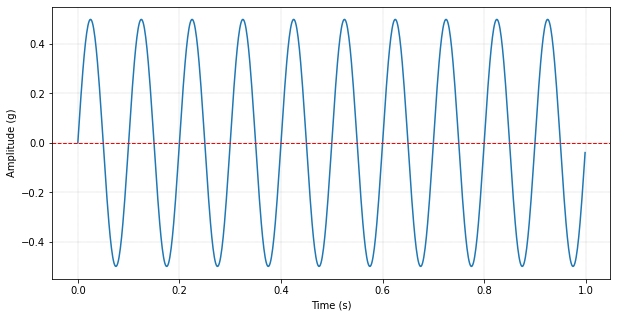

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (g)')
plt.axhline(linewidth=1, color='r',linestyle='--')
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')

#### Plotting y2

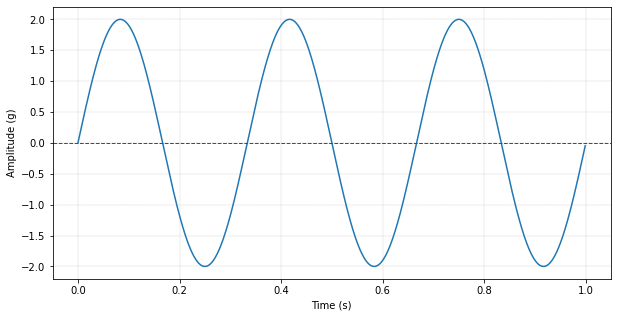

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, y2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (g)')
plt.axhline(linewidth=1, color='r',linestyle='--')
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')

#### Creating a new y3 by combining y1+y2

Let us consider **y3** as an acceleration record made of sin functions from **y1** and **y2**. Obviously this is an over simplified response, but for example puposes, this helps in understand what the FFT does. 

We know that: <br>
**y1 = 1/2 sin (20pi*x)** <br>
**y2 = 2 sin (6pi*x)** <br>

Then we set up y3 as **y3 = y1 + y2**. <br>

Consequently, we have **y3 = 1/2 sin (20pi*x) + 2 sin (6pi*x)**


#### Plotting y3

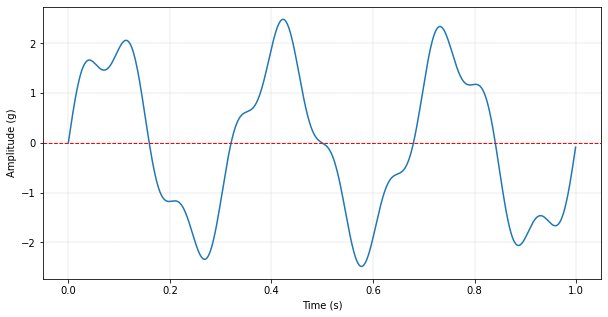

In [ ]:
# We create Y3 by adding Y1 and Y2
y3 = y1+y2
# We plot it
plt.figure(figsize=(10, 5))
plt.plot(x, y3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (g)')
plt.axhline(linewidth=1, color='r',linestyle='--')
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')

#### Getting the Frequencies using the Fast Fourier Transform

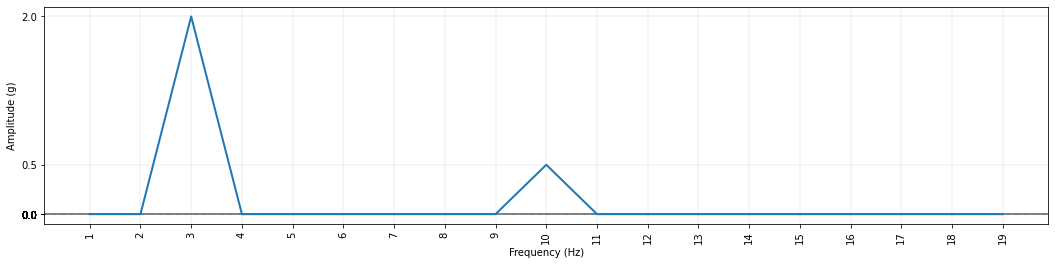

In [ ]:

yf = fft(y3)
xf = fftfreq(N, T)[:N//2]



plt.figure(figsize=(18, 4))

plt.plot(xf[1:20], 2.0/N * np.abs(yf[0:N//2])[1:20],linewidth='2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (g)')
plt.xticks(xf[1:20],rotation = 90)
plt.yticks(np.round(2.0/N * np.abs(yf[0:N//2])[1:20],2))
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.show()

This show that the dominant frequencies in our acceleration records are the peaks we see in the picture above, that is **f1= 3 Hz** and **f2= 10 Hz**. <br> Those are what we are concerned about as those frequencies might be related to how the structure deforms.

#### How do we know we are correct and the FFT is a powerful tool for ever complex record of accelerations?

**Comment 1:** We know that period (T) is inversely proportional to freqency(f). That is **T = 1/f**<br> So:<br>**T1** = 1/f1 = 1/ 3 = **0.333**. <br> **T2** = 1/f2 = 1/10 = **0.1**.

**Comment 2**: Moreover, if we observe the **y** axis values, we can see that we have the amplitudes of **2** and **0.5** are well represented. Those correspond to the amplitude of the 2 sines functions we defined earlier!!

**Comment 3**: Notice how those values are exactly the same as the values we calculated previous. This is the power of FFT and why it is so important in our work. For complex ground acceleration recordings, we can create a freqeuncy spectrum that will only show us what are the dominating frequencies.

#### Extension of Time Signal

If you notive, we only plotted our acceleration signals for a period of **1sec**. Try plotting for a longer time signal. That is increase the number N. <br>

What you will notice are the followings: <br>

* The more sampling point, the better the resolution the frequency
* The longer the time window, we have a better resolution in the frequency range
* Helps better the spectrogram 



<br>
--
##  **Implementing the Fast Fourier Transform**

#### Mathematical Approach

Fourier analysis is a method for expressing a function as a sum of periodic functions. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). 

**Forward Discrete Fourier Transform (DFT) Formula**

$
X_k = \sum_{n=N-1}^{n=0} x_n * e^\frac{(-i2 \pi kn)}{N}
$

**Inverse Discrete Fourier Transform (IDFT) Formula**

$
X_n = \frac{1}{N} \sum_{n=N-1}^{k=0}X_k e^\frac{(i2 \pi kn)}{N}
$

<br>

#### Python Librairies

Calculating the Fourier Transform by hand is very tedious and time consuming. Thankfully, there are several python packages we can use that complete these calculation for us! By importing the specific packages, we are able to easily compute the operations needed in order to transform our data. We will be using the **Scipy** package to implement the FFT.

SciPy (scientific python) is an open-source Python library used for scientific and technical computing. SciPy is a broad ecosystem and packages include NumPy, Matplotlib, and Pandas, all of which we have learned about, and now we will dive into the uses of the specific SciPy package. 



** Run the following cell to import the SciPy package!**

In [ ]:
import scipy

SciPy functions can be used to compute mathematical functions in an easy and efficient way. Some of SciPy's uses include polynomial interpolation, linear algebra, integration, and more. We will use SciPy in combination with other packages to manipulate our data and create useful visualizations.

### The Fast Fourier Transform in SciPy

SciPy's expansive amount of functions allows us to compute FFT and inverse FFT easily. See below on how to import functions from SciPy and use them.

1. ** scipy.fft.fft**<br><br> Compute the 1-D inverse discrete Fourier Transform. <br><br> **scipy.fft.fft(x, n=None, axis=- 1, norm=None, overwrite_x=False, workers=None, *, plan=None)** <br><br>![image info](Pictures/scipy_fft.png)

2. **scipy.fftfreq() ** <br><br>  Return the Discrete Fourier Transform sample frequencies.<br><br> **scipy.fftpack.fftfreq(n, d=1.0)** <br><br>![image info](Pictures/scipy_fftfreq.png)

3. ** scipy.fft.ifft**<br><br>Compute the 1-D inverse discrete Fourier Transform.

This function computes the inverse of the 1-D n-point discrete Fourier transform computed by fft. In other words, ifft(fft(x)) == x to within numerical accuracy.<br><br>
** scipy.fft.ifft(x, n=None, axis=- 1, norm=None, overwrite_x=False, workers=None, *, plan=None)** <br>

<br>

### **Implementing the Fast Fourier on Accelerometers Data Set**

In [ ]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Normalizing and Resetting Axes

In [ ]:
sw_df_axes_reset = pd.read_csv('sather-tower-files/SouthWest.csv')
sw_df_axes_reset["Global X"] = sw_df_axes_reset["Ay[mG]"]
sw_df_axes_reset["Global Y"] = sw_df_axes_reset["Az[mG]"]
sw_df_axes_reset["Global Z"] = sw_df_axes_reset["Ax[mG]"]
sw_df_axes_reset = sw_df_axes_reset[['Sample No.', 'time[sec]', 'Global X', 'Global Y', 'Global Z', 'ATotal[mG]', 'Ts[deg.C]']]
sw_df_axes_reset.head()

NameError: name 'pd' is not defined

### Performing FFT on X-Acceleration

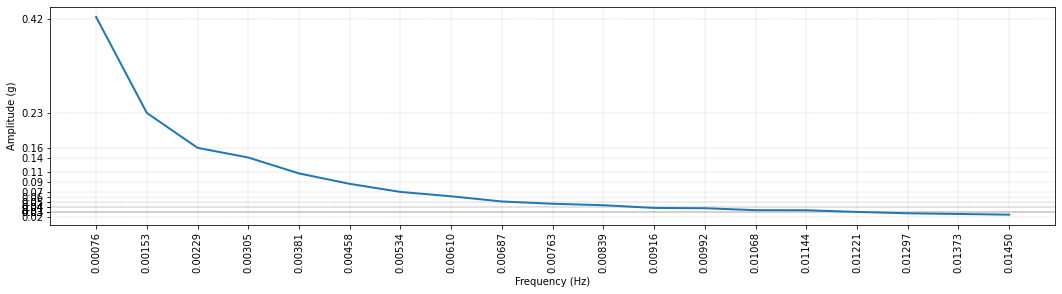

In [ ]:
fft_x = fft(np.array(sw_df_axes_reset["Global X"]))
N = len(sw_df_axes_reset["Global X"])
T = 1.0 / 800.0
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(18, 4))

plt.plot(xf[1:20], 2.0/N * np.abs(fft_x[0:N//2])[1:20],linewidth='2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (g)')
plt.xticks(xf[1:20],rotation = 90)
plt.yticks(np.round(2.0/N * np.abs(fft_x[0:N//2])[1:20],2))
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.show()

### Performing  FFT on Y-Acceleration

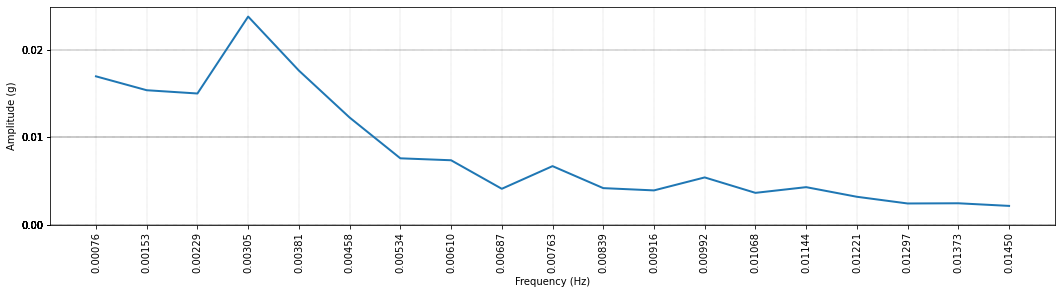

In [ ]:
fft_y = fft(np.array(sw_df_axes_reset["Global Y"]))
N = len(sw_df_axes_reset["Global Y"])
T = 1.0 / 800.0
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(18, 4))

plt.plot(xf[1:20], 2.0/N * np.abs(fft_y[0:N//2])[1:20],linewidth='2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (g)')
plt.xticks(xf[1:20],rotation = 90)
plt.yticks(np.round(2.0/N * np.abs(fft_y[0:N//2])[1:20],2))
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.show()

### Performing FFT on Z-Acceleration

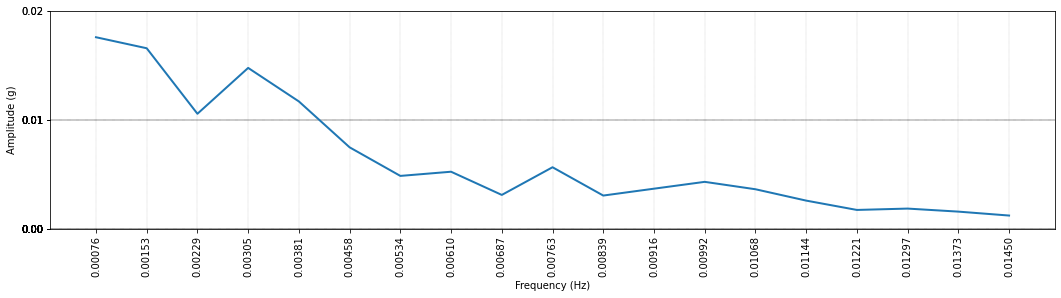

In [ ]:
fft_z = fft(np.array(sw_df_axes_reset["Global Z"]))
N = len(sw_df_axes_reset["Global Z"])
T = 1.0 / 800.0
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(18, 4))

plt.plot(xf[1:20], 2.0/N * np.abs(fft_z[0:N//2])[1:20],linewidth='2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (g)')
plt.xticks(xf[1:20],rotation = 90)
plt.yticks(np.round(2.0/N * np.abs(fft_z[0:N//2])[1:20],2))
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.show()

### What does our data mean now?
We individually applied FFT operations on each acceleration direction: X, Y, and Z.
We have successfully implemented the FFT on our acceleration data set and created visualizations to help understand what our data means now. 

By applying the FFT package, we can now look at how the acceleration is made up of different frequencies and amplitudes which provides us more insights on how the Campanile moves. Fourier analysis of frequency domains provides us important values that are helpful in civil engineering. 



<br>
--
##  Spectrograms

### What is a Spectrogram?
A **spectrogram** is a visualization of the spectrum of frequencies of a signal (y-axis) as it varies with time (x-axis). A spectrogram illustrates how the dominant frequencies change with time. In other words, a spectrogram gives the analyzer a much deeper understanding of the vibration profile and how it changes with time. As such, spectrograms will give us a better understanding of sublte movements of the Campanile and how it changes over time.

<br><br>![image info](Pictures/spectrogram.png)

### How do we graph a Spectrogram in Python?

We will create spectrograms using a Python library called **SciPy** which is used for scientific and technical computing. SciPy has a specific FFT and signal package that will allow us to create these spectrograms. 

Read more about scipy documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html


<br><br>![image info](Pictures/signal_spec.png)

### Let's try it out!

In this notebook, we will learn how to graph a spectrogram using consecutive Fourier transforms using not only scipy, but also matplotlib.



First, we have to import the libraries and packages necessary to begin our computations. We have to import specific packages from scipy as well as matplotlib in order to create the spectrogram. 

In [ ]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np

Next, let's walk through an example to create a simple spectrogram. This example is taken from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

The following code creates the test signal at a specific frequency that we will use in our spectrogram. 

In [ ]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise


The following code creates the plot, using using the package signal. "signal.spectrogram " computes the spectrogram points based on our frequency that we created above. It returns values for f, an array of sample frequencies, t, an array of time segments, and Sxx, a spectrogram of x. 

Then we use matplotlib to create the visualization.

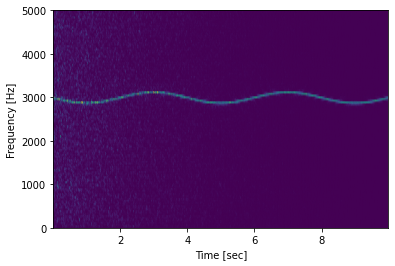

In [ ]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

We also can consider if output is not one-sided, then we will incorporate the fftshift into our computations. 

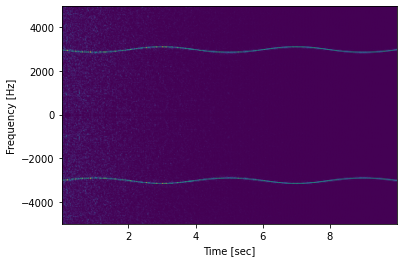

In [ ]:
f, t, Sxx = signal.spectrogram(x, fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Now we will implement the FFT on the accelerometer data set we worked with in the previous notebooks.

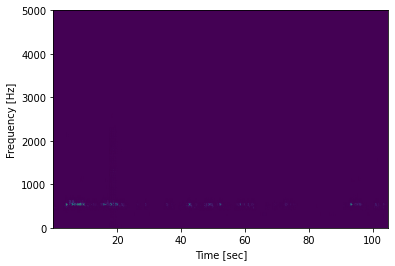

In [ ]:
x = (np.array(sw_df_axes_reset["Global X"]))
fs = 10e3
#what fs value do I put?
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

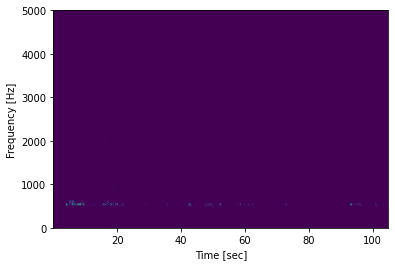

In [ ]:
y = (np.array(sw_df_axes_reset["Global Y"]))
fs = 10e3
#what fs value do I put?
f, t, Sxx = signal.spectrogram(y, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

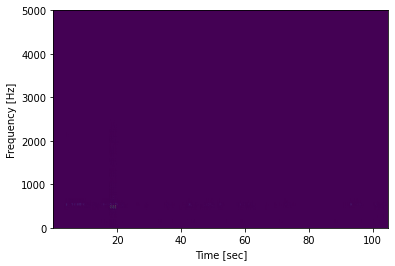

In [ ]:
z = (np.array(sw_df_axes_reset["Global Z"]))
fs = 10e3
#what fs value do I put?
f, t, Sxx = signal.spectrogram(z, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<br>
--
## Power Spectral Density (PSD)

Power Spectral Density (PSD) is a plot of signal's power content versus frequency. A PSD is typically used to characterize broadband random signals. 

Let's assume you are operating a factory with many machines and some of them have motors inside. You detect unwanted vibrations from somewhere. You might be able to get a clue to locate offending machines by looking at PSD which would give you frequencies of vibrations.

![image info](Pictures/scipy_powerspectraldensity.png)

#### PSD in SciPy

SciPy has various libraries that are able to compute and generate Power Spectral Density plots. In this section, we will be using the matplotlib library to visualize our graphs and scipy library to generate data for our power spectral density plots.

We will start off by importing the appropriate libraries.

In [ ]:
#Import the neccessary libraries.
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Next, we must generate data to be plotted onto our spectral power density plots. We will be plotting the following function: 
$$$
2* \sqrt(2) * sin(2\pi* frequency * time)
$$$
We will also add random noise to the data.

In [ ]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

SciPy has the function "signal.periodogram" which estimates the power spectral density using a periodogram. A periodogram is an estimate of the spectral density of a signal. We will first generate a Spectral Power Density Plot using this function.
 
Click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html) to learn more about the signal.periodogram function.

In the next block of code, we will generate frequency and the values for the power spectral density by using "signal.periodogram(array of data, frequency value)". Afterwards, we can plot the data using Matplotlib's "semilogy" function.

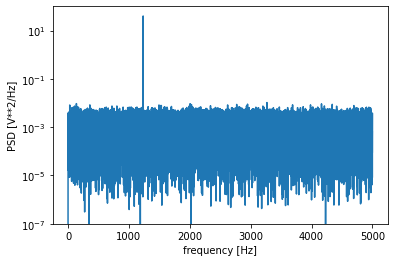

In [ ]:
#Generate Spectral Power Density using a Periodogram.
frequencies, power_spectrum_vals = signal.periodogram(x, fs)
plt.semilogy(frequencies, power_spectrum_vals)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

SciPy has another function, "welch" which estimates a power spectral density using Welch's method. Welch's method computes this estimate by dividing the data into segments, computing a periodogram for each segment and then averaging the periodograms.

Click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html) to learn more about the signal.periodogram function.

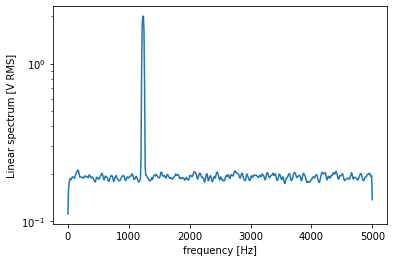

In [ ]:
#Generate a Spectral Power Density using Welch's Method.
frequencies, power_spectrum_vals = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.semilogy(frequencies, np.sqrt(power_spectrum_vals))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

#### **Implementing Power Density on Accelerometers DataSet**

In [ ]:
pd.read_csv('sather-tower-files/NorthEast.csv')

,Sample No.,time[sec],Ax[mG],Ay[mG],Az[mG],ATotal[mG],Ts[deg.C]
0,1,0.000,1002.844572,12.062907,10.852396,1002.975834,15.4248
1,2,0.002,1002.829492,12.024105,10.839164,1002.960147,15.4248
2,3,0.004,1002.837181,12.014031,10.863066,1002.967973,15.4248
3,4,0.006,1002.841711,12.053967,10.904431,1002.973430,15.4248
4,5,0.008,1002.827466,12.071192,10.914207,1002.959500,15.4248
...,...,...,...,...,...,...,...
1048567,1048568,2097.134,1002.814651,11.376202,10.396540,1002.933063,16.5127
1048568,1048569,2097.136,1002.827168,11.353433,10.395110,1002.945306,16.5127
1048569,1048570,2097.138,1002.849817,11.392355,10.416329,1002.968614,16.5127
1048570,1048571,2097.140,1002.843916,11.434555,10.424852,1002.963283,16.5127


In [ ]:
np.abs(5)

5

<br>
-
## Bibliography

Notebooks Developed By: Abdoul Aziz Sandotin, Arda Ulug, Karalyn Chong, Priscilla Zhang, Salvador Ramirez Jr.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ebd495-2227-475e-8d87-73e1af6a492b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>